In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 定义使用sigmoid的三层BP且输出维度为1网络，指定输入，隐藏量层的维度
class BP_3layers1out:
    # 初始化权重矩阵和偏置向量，指定学习率
    def __init__(self, num_inputs, num_hiddens, lr):
        self.W1 = np.random.randn(num_inputs, num_hiddens)
        self.b1 = np.random.randn(1, num_hiddens)
        self.W2 = np.random.randn(num_hiddens, 1)
        self.b2 = np.random.randn(1, 1)
        self.lr = lr
    
    # 定义激活函数
    def sigmoid(self, x):
        # 当x能取负值时会出现指数爆炸的情况，需要修改
        # return 1 / (1 + np.exp(-x))
        # 这么直接改也不行
        #if x.all() >= 0:
        #     return 1.0 / (1 + exp(-x))
        # else:
        #     return exp(x) / (1 + exp(x))
        # 参考链接：https://blog.csdn.net/cgy13347250452/article/details/125276177
        y = x.copy()
        y[x >= 0] = 1.0 / (1 + np.exp(-x[x >= 0]))
        y[x < 0] = np.exp(x[x < 0]) / (1 + np.exp(x[x < 0]))
        return y
    
    # 定义损失函数SE
    def loss_MSE(self, y_hat, y):
        return 0.5 * sum((y_hat - y) ** 2) / len(y)
    
    # 前向传播
    # x为一个数据向量
    def forward(self, x):
        # 先计算隐藏层
        h = self.sigmoid(x @ self.W1 + self.b1)
        # 返回隐藏层变量和输出
        return self.sigmoid(h @ self.W2 + self.b2), h
    
    # 具体推导过程见笔记链接
    # 反向传播更新
    def bp(self, y_hat, y, h, x):
        # 标量
        dLdy = y_hat - y
        # 标量对标量求导还是标量
        dLdb2 = dLdy * y_hat * (1-y_hat)
        # 标量对向量求导
        # 等价于标量对向量中的每个元素求导，需要转置
        dLdW2 = dLdb2 * h.T
        # 标量对向量求导
        dLdb1 = dLdy * self.W2.T * h * (1-h)
        # 标量对矩阵求导
        dLdW1 = x.T @ dLdb1
        
        # 更新
        self.b2 -= self.lr * dLdb2
        self.W2 -= self.lr * dLdW2
        self.b1 -= self.lr * dLdb1
        self.W1 -= self.lr * dLdW1
        
    # 对有限的数据不断利用更新参数
    def train(self, inputs, outputs, epochs=5000, decay=False):
        loss =[]
        for i in range(epochs):
            # print(i)
            # 衰减学习率
            if decay:
                self.lr /= (1 + i * 0.00001)
            for (x, y) in zip(inputs, outputs):
                # ndarry默认没有维度，需要通过reshape调整
                x = x.reshape(1, -1)
                y_hat, h = self.forward(x)
                self.bp(y_hat, y, h, x)
            loss.append(self.loss_MSE(self.predict(inputs), outputs))
        return loss
    
    def predict(self, inputs):
        outputs = np.zeros(len(inputs))
        for i in range(len(inputs)):
            y_hat,_ = self.forward(inputs[i].reshape(1, -1))
            outputs[i] = y_hat
        return outputs

对于数据： [0 0] ，计算值为 0.030635447101349477 判定值为： 0
对于数据： [0 1] ，计算值为 0.9615206908794715 判定值为： 1
对于数据： [1 0] ，计算值为 0.9778519429263112 判定值为： 1
对于数据： [1 1] ，计算值为 0.03648110434624149 判定值为： 0


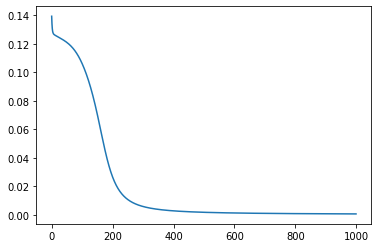

In [3]:
# 拟合XOR，输出为2个元素，隐藏层用5个神经元
xor = BP_3layers1out(2, 5, 0.5)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])
loss = xor.train(inputs, outputs, epochs=1000)
plt.plot(range(len(loss)), loss)

pre = xor.predict(inputs)
for (x, y) in zip(inputs, pre):
    if y < 0.5:
        label = 0
    else:
        label = 1
    print("对于数据：", x, "，计算值为", y.item(), "判定值为：", label)